# Analyzing results of one experiment.
### Finding std of std and mean
### plotting the predictions
### plotting kde
### KS test

### traffic-nips has 

963 train series

6741 test series = 7 * 963

the prediction length is 24 

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt


In [2]:
from src.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/traffic_nips/1A'

# Forecast section

## Load data

In [5]:
# read the forcast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1)

101it [00:00, 26522.96it/s]
100%|###########| 100/100 [03:37<00:00,  2.18s/it]


In [6]:
len(forcast_list1)

100

In [7]:
forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample90,sample91,sample92,sample93,sample94,sample95,sample96,sample97,sample98,sample99
0,1,0,2008-06-15 17:00:00,0.028350,0.024031,0.028417,0.027856,0.025824,0.025447,0.022454,...,0.021542,0.026103,0.025176,0.021612,0.030469,0.018757,0.029491,0.026713,0.014287,0.028270
1,1,0,2008-06-15 18:00:00,0.019783,0.012870,0.022937,0.019817,0.017738,0.020516,0.018255,...,0.013682,0.022882,0.021164,0.013668,0.016662,0.015784,0.022616,0.017735,0.014778,0.022391
2,1,0,2008-06-15 19:00:00,0.017150,0.011041,0.017988,0.016234,0.014714,0.018186,0.016799,...,0.012153,0.019930,0.015415,0.013520,0.014002,0.011281,0.016752,0.015277,0.008677,0.017937
3,1,0,2008-06-15 20:00:00,0.014717,0.011780,0.014052,0.013422,0.013129,0.015640,0.014720,...,0.012747,0.016426,0.013574,0.011627,0.012218,0.010105,0.015873,0.013373,0.009570,0.014587
4,1,0,2008-06-15 21:00:00,0.012967,0.008963,0.012803,0.012013,0.012030,0.013374,0.012494,...,0.011660,0.015016,0.012201,0.010869,0.011398,0.010146,0.013471,0.011205,0.008184,0.014282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161779,1,6740,2008-06-22 12:00:00,0.081800,0.077928,0.079233,0.078984,0.071641,0.088470,0.080774,...,0.067377,0.082520,0.075312,0.073471,0.080201,0.074788,0.071766,0.069899,0.076113,0.081469
161780,1,6740,2008-06-22 13:00:00,0.080983,0.077688,0.081614,0.085797,0.077982,0.083030,0.068984,...,0.067407,0.076679,0.079739,0.078838,0.078546,0.068606,0.069904,0.077776,0.083652,0.075799
161781,1,6740,2008-06-22 14:00:00,0.087267,0.092541,0.094277,0.099611,0.096184,0.099040,0.089823,...,0.077976,0.087878,0.121247,0.084844,0.110264,0.089065,0.137166,0.094733,0.107132,0.090899
161782,1,6740,2008-06-22 15:00:00,0.120983,0.113647,0.124498,0.134951,0.129827,0.127471,0.126682,...,0.112118,0.124094,0.133519,0.142600,0.140137,0.126031,0.139140,0.142853,0.134867,0.126686


In [8]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=963)

In [13]:
sorted_forcast_list1[0].head(169)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2008-06-15 17:00:00,0.028350,0.024031,0.028417,0.027856,0.025824,0.025447,0.022454,...,0.030469,0.018757,0.029491,0.026713,0.014287,0.028270,0,0.024383,0.009758,0.102604
1,1,0,2008-06-15 18:00:00,0.019783,0.012870,0.022937,0.019817,0.017738,0.020516,0.018255,...,0.016662,0.015784,0.022616,0.017735,0.014778,0.022391,0,0.019985,0.007850,0.096798
2,1,0,2008-06-15 19:00:00,0.017150,0.011041,0.017988,0.016234,0.014714,0.018186,0.016799,...,0.014002,0.011281,0.016752,0.015277,0.008677,0.017937,0,0.016744,0.004424,0.111817
3,1,0,2008-06-15 20:00:00,0.014717,0.011780,0.014052,0.013422,0.013129,0.015640,0.014720,...,0.012218,0.010105,0.015873,0.013373,0.009570,0.014587,0,0.013999,0.002985,0.098602
4,1,0,2008-06-15 21:00:00,0.012967,0.008963,0.012803,0.012013,0.012030,0.013374,0.012494,...,0.011398,0.010146,0.013471,0.011205,0.008184,0.014282,0,0.012623,0.002166,0.112713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,5778,2008-06-22 13:00:00,0.026083,0.022219,0.024342,0.024565,0.030626,0.021574,0.018023,...,0.027704,0.023084,0.025469,0.024017,0.023229,0.019918,0,0.023459,0.003022,0.145186
165,1,5778,2008-06-22 14:00:00,0.028083,0.022736,0.022272,0.024899,0.022159,0.021813,0.020112,...,0.027222,0.055205,0.025348,0.024417,0.021872,0.019954,0,0.024084,0.003955,0.108192
166,1,5778,2008-06-22 15:00:00,0.023383,0.022329,0.024907,0.026117,0.021427,0.023219,0.020955,...,0.030368,0.042997,0.027158,0.025745,0.024984,0.022759,0,0.025177,0.003123,0.112933
167,1,5778,2008-06-22 16:00:00,0.025383,0.030533,0.024278,0.026302,0.021538,0.025562,0.022301,...,0.028582,0.041764,0.026380,0.027464,0.020625,0.024810,0,0.025926,0.003886,0.161377


## get each time series individually

In [14]:
target_forcast_series = get_forcast_target(forcast_list1)

In [15]:
# this dataframe is just one time series
ts_number = 45
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

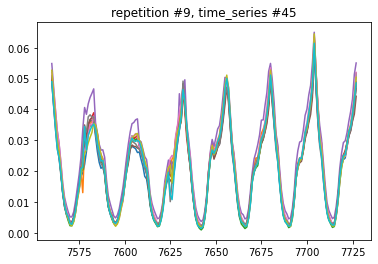

In [16]:
# plot mean of only one time series
rep_no = 1
for rep_no in range(10):
    plt.title(f'repetition #{rep_no}, time_series #{ts_number}')
    ts_list1[rep_no]['mean'].plot()
    # plt.xlim(20600,20700)

## plot the kde for experiments

for each datapoint in data_n, it plots kde of different repetition. number of repetition is 'max_shape'

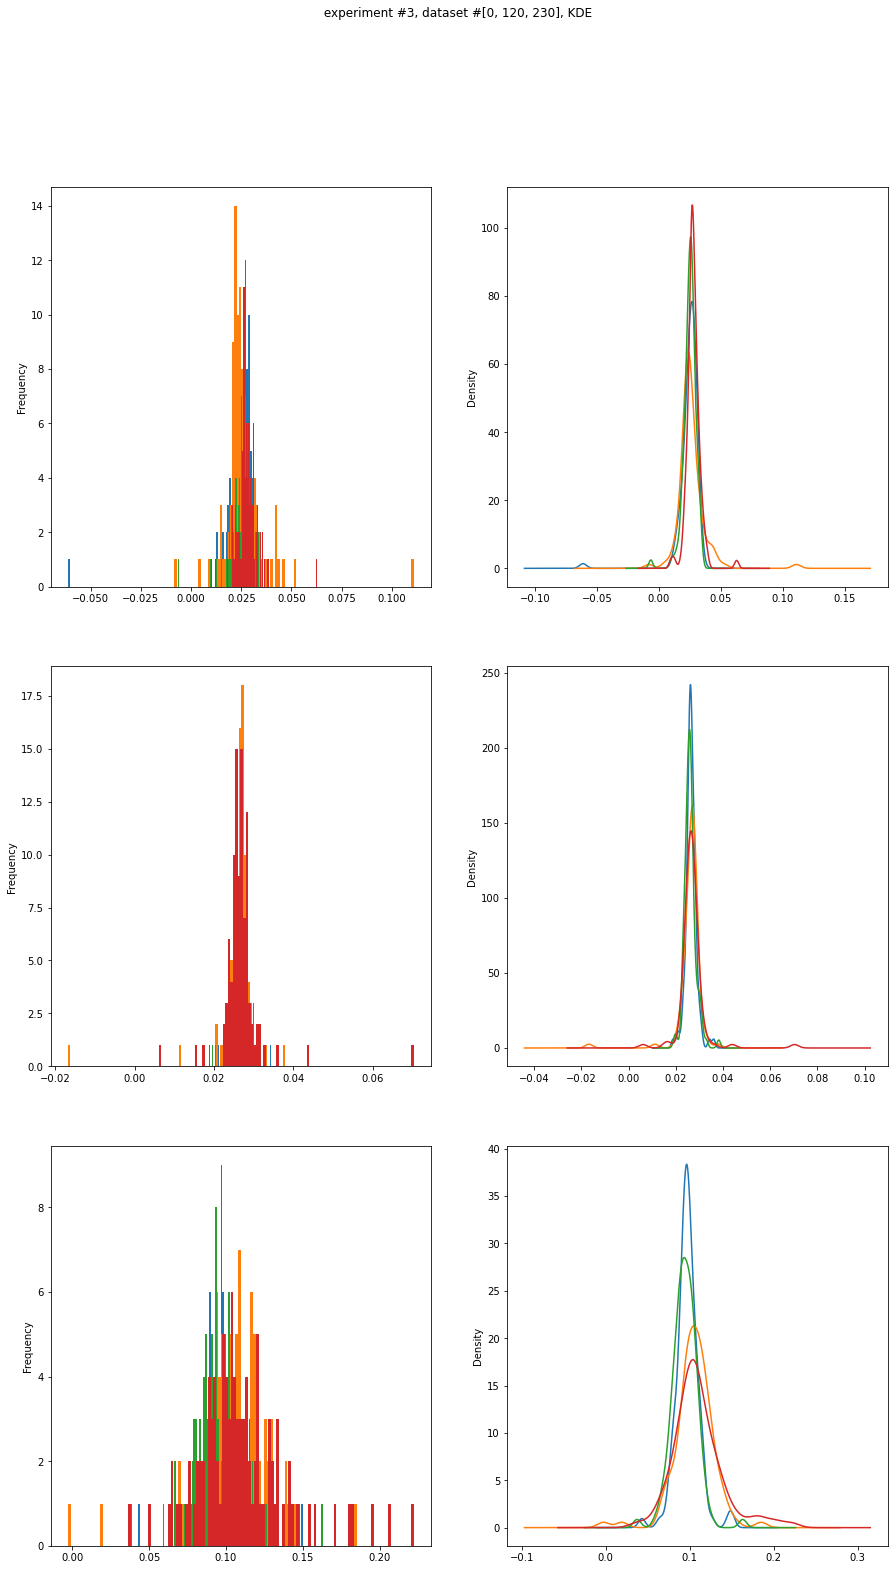

In [17]:
data_n = [0, 120, 230]
max_shape = 4 # number of experiments that are going to be plotted
plot_kde_hist(data_n, max_shape, sorted_forcast_list1)

## std of mean and std over time

In [18]:
## calculate the std over different repetitions
forecast_distrib_df1 = get_forcast_distrib(forcast_list1)
# convert the list of dataframes to a 3d np
forecast_np = get_np_forcast(forecast_distrib_df1)
# get std over different experiments
forecast_std_np = get_std_np(forecast_np, forecast_distrib_df1)
df_std_forecast = pd.DataFrame(forecast_std_np)
df_std_forecast.rename(index={0:'mean',1:'sigma'}, inplace=True)

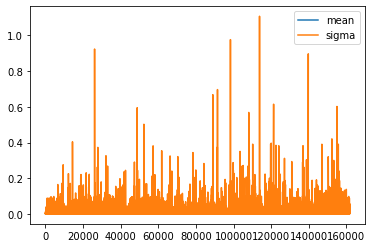

In [19]:
df_std_forecast.T.plot()

## plot samples of experimets

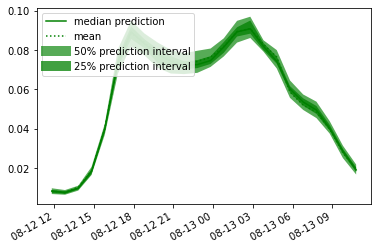

In [20]:
sample_forcast_list1 = get_forcast_samples(forcast_list1)
tmp_n = 23000
plot_forscast_same(sample_forcast_list1, tmp_n, lim=0)

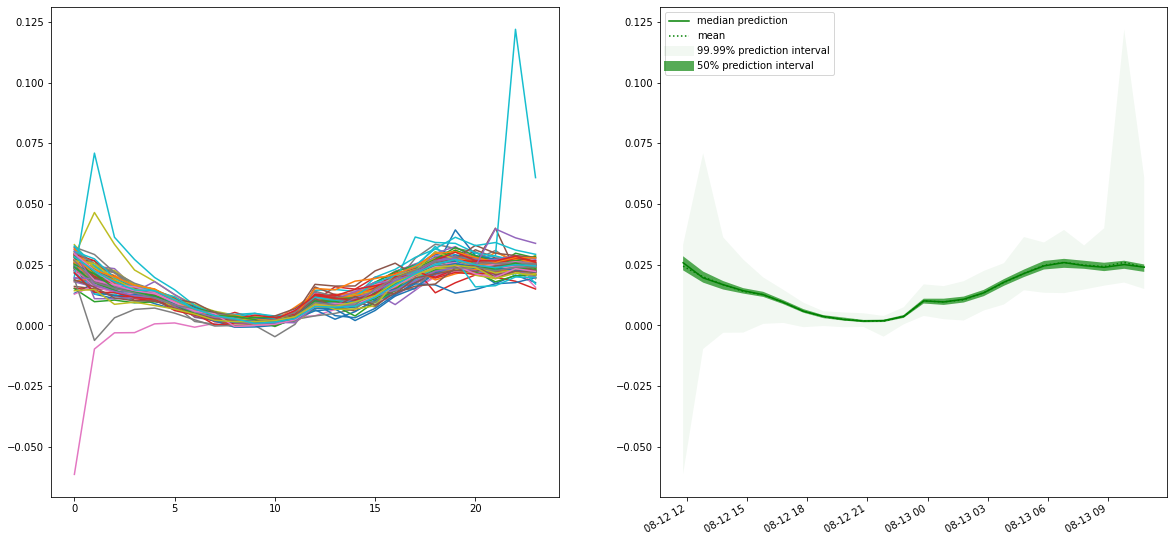

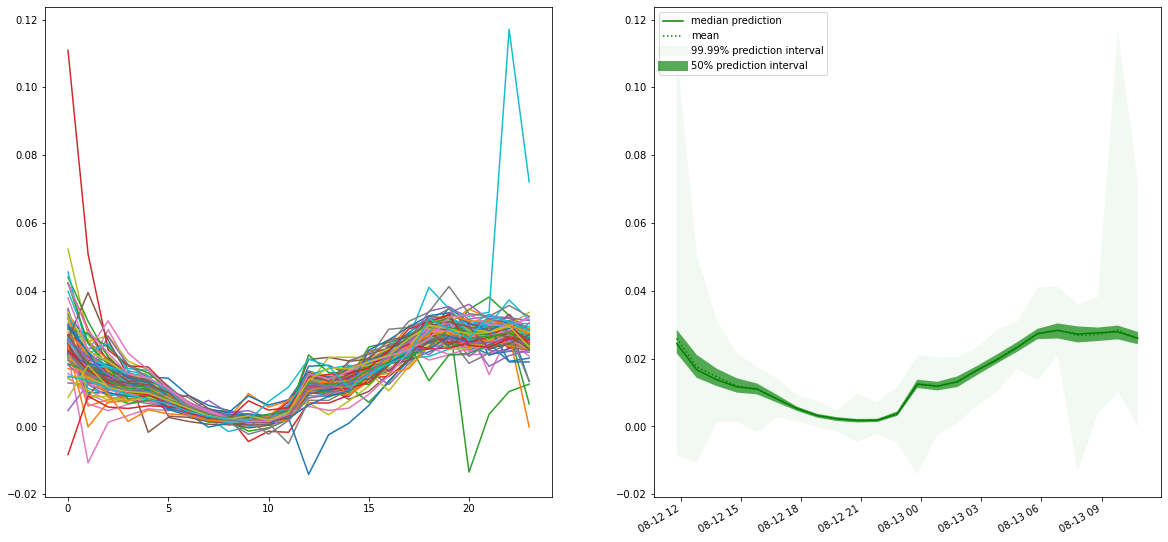

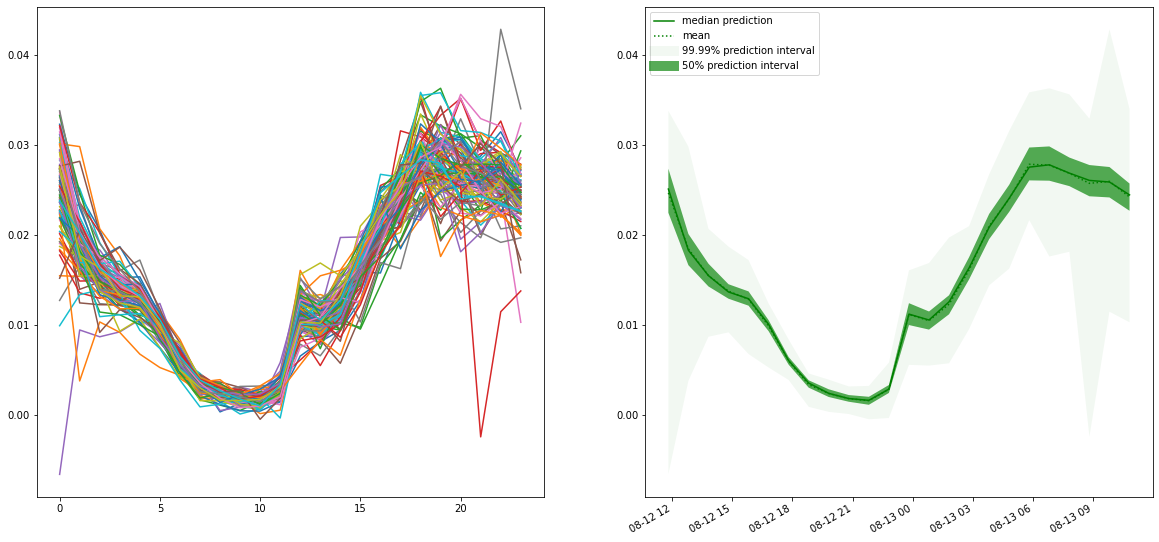

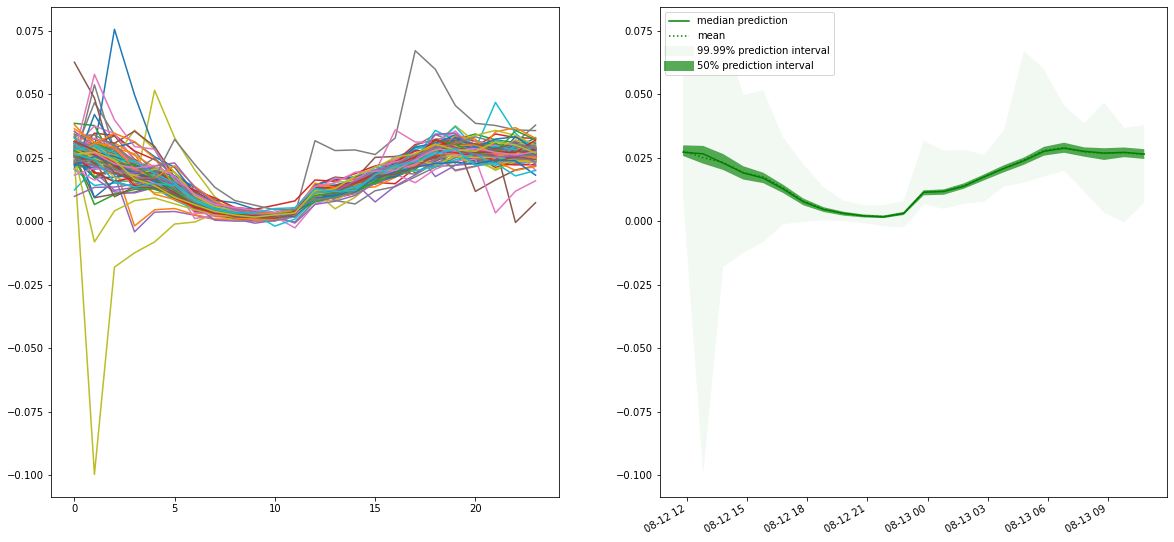

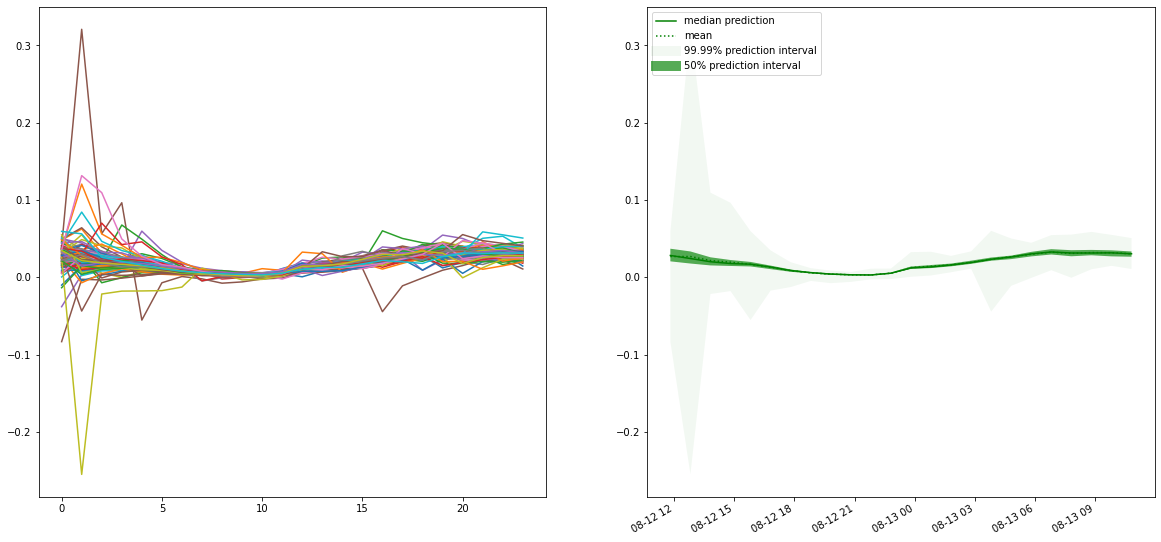

In [21]:
time_point_no = 0
rep_lim = 5
save_plot_exp(sample_forcast_list1, rep_lim, time_point_no)

## KS Test

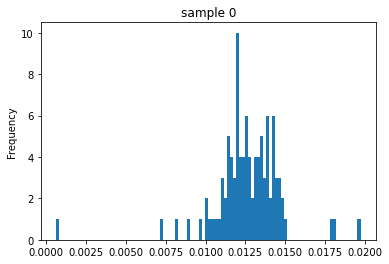

In [24]:
# plot the samples
plt.title('sample 0')
sample0.plot.hist(bins = 100)
# plt.xlim([-40,70])

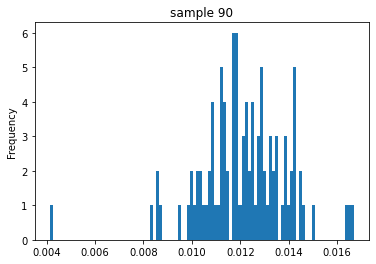

In [25]:
plt.title('sample 90')
sample90.plot.hist(bins = 100)
# plt.xlim([-40,70])

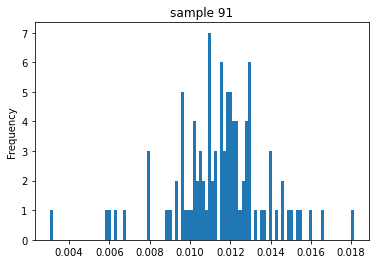

In [26]:
plt.title('sample 91')
sample91.plot.hist(bins = 100)
# plt.xlim([-40,70])

In [27]:
# calculate the table of ks tests for each time points
data_point = 4
ks_table = get_ks_tmp(sample_forcast_list1, data_point)

In [28]:
ks_table

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,False,True,False,False,True,False,True,False,False,...,True,False,False,True,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [29]:
# calculate the proportion of true/all for upper triangle of the table
portion_ks_table(ks_table)

0.19717171717171716

As it is apparant for tmp=12 the ks test gave us good results. however, for tmp=1000 it is not the case

In [34]:
# now we can loop through all 53000 time points and output the results
# try it for first 1000 points
tmp_lim = 100

portion_array = np.zeros(tmp_lim)

for data_point in range(tmp_lim):
    ks_table = get_ks_tmp(sample_forcast_list1, data_point)  
    portion_array[data_point]= portion_ks_table(ks_table)
    print(data_point)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


IndexError: index 100 is out of bounds for axis 0 with size 100

(0.0, 24.0)

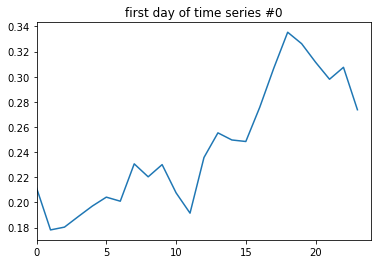

In [62]:
i = 0
plt.plot(portion_array[i*168: (i)*168 + 24])
plt.title(f'first day of time series #{i}')
plt.xlim(0,24)

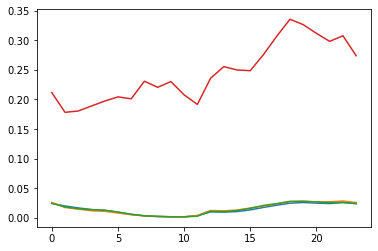

In [61]:
#time series number
i = 0

for j in range(3):
    (sorted_forcast_list1[j]['mean'].iloc[i*168: (i)*168 + 24]).plot()

plt.plot(portion_array[i*168: (i)*168 + 24])
# plt.xlim(0,24)

Text(0.5, 1.0, 'time series #0')

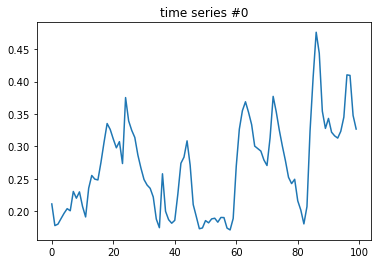

In [63]:
i = 0
plt.plot(portion_array[i*168 : (i+1)*168])
plt.title(f'time series #{i}')

Text(0.5, 1.0, 'all time series')

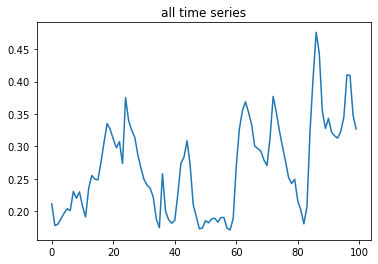

In [64]:
plt.plot(portion_array)
plt.title('all time series')